In [36]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import (
    f_classif,
    SelectFpr,
    SelectKBest,
)


In [106]:
# Load the dataset
df = pd.read_csv('/content/Breast_cancer.csv')

# Display the first 5 rows of the dataset
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Number of cells categorized as Benign:  357
Number of cells categorized as Malignant:  212

Percentage of cells categorized as Benign 62.74 %
Percentage of cells categorized as Malignant 37.26 %


<ipython-input-38-acff1216b3e4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['diagnosis'], palette= 'RdBu')


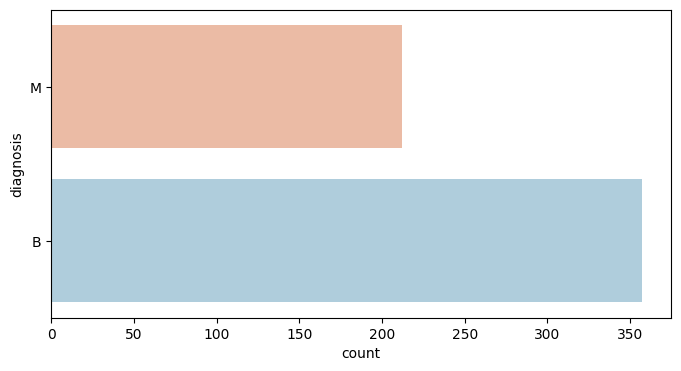

In [38]:
# Visualizing distribution of classes
plt.figure(figsize=(8, 4))
sns.countplot(df['diagnosis'], palette= 'RdBu')

# Counting the number of observations in each class (i.e., # of observations for B vs. M)
benign, malignant = df['diagnosis'].value_counts()
print('Number of cells categorized as Benign: ', benign)
print('Number of cells categorized as Malignant: ', malignant)
print('')
print('Percentage of cells categorized as Benign', round(benign / len(df) * 100, 2), '%')
print('Percentage of cells categorized as Malignant', round(malignant / len(df) * 100, 2), '%')

## **Class Imbalance:** The dataset is imbalanced, with 62.74% of the cases being diagnosed with benign and 37.26% of cases being categorized as Malignant.

In [39]:
# Summary statistics
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## The std values for some features are high (like area_mean). This could be a sign of existing outliers. To check this observation, I will check if outliers in the dataset.

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Preprocessing Dataset

1. Dealing with missing values
2. Dealing with outliers
3. Encoding categorical data
4. Splitting the dataset into train and test set
5. Feature scaling

In [41]:
# Checking for missing values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [107]:
# Map diagnosis to binary values
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)
df.head(5) # Ensuring the values have changed

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [108]:
# Change diagnosis to category Dtype
df['diagnosis']= df['diagnosis'].astype('category', copy=False)

In [109]:
# Although the feature 'id' is represented by numbers, it should not be treated as numeric values because they are identifiers rather than quantities or measures.
# Unnamed: 32'includes NaN values
# Both attributes will be dropped from the df

df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In [54]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [104]:
# splitting the data into 2 variables (attributes and target variable)
target_variable = df['diagnosis']
attributes = df.drop(['diagnosis'], axis=1)

In [56]:
print(target_variable)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: category
Categories (2, int64): [0, 1]


In [57]:
attributes.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## **Outliers**

<ipython-input-58-4c9612436bf0>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=0)


[Text(0, 0, 'radius_mean'),
 Text(1, 0, 'texture_mean'),
 Text(2, 0, 'perimeter_mean'),
 Text(3, 0, 'area_mean'),
 Text(4, 0, 'smoothness_mean'),
 Text(5, 0, 'compactness_mean'),
 Text(6, 0, 'concavity_mean'),
 Text(7, 0, 'concave points_mean'),
 Text(8, 0, 'symmetry_mean'),
 Text(9, 0, 'fractal_dimension_mean'),
 Text(10, 0, 'radius_se'),
 Text(11, 0, 'texture_se'),
 Text(12, 0, 'perimeter_se'),
 Text(13, 0, 'area_se'),
 Text(14, 0, 'smoothness_se'),
 Text(15, 0, 'compactness_se'),
 Text(16, 0, 'concavity_se'),
 Text(17, 0, 'concave points_se'),
 Text(18, 0, 'symmetry_se'),
 Text(19, 0, 'fractal_dimension_se'),
 Text(20, 0, 'radius_worst'),
 Text(21, 0, 'texture_worst'),
 Text(22, 0, 'perimeter_worst'),
 Text(23, 0, 'area_worst'),
 Text(24, 0, 'smoothness_worst'),
 Text(25, 0, 'compactness_worst'),
 Text(26, 0, 'concavity_worst'),
 Text(27, 0, 'concave points_worst'),
 Text(28, 0, 'symmetry_worst'),
 Text(29, 0, 'fractal_dimension_worst')]

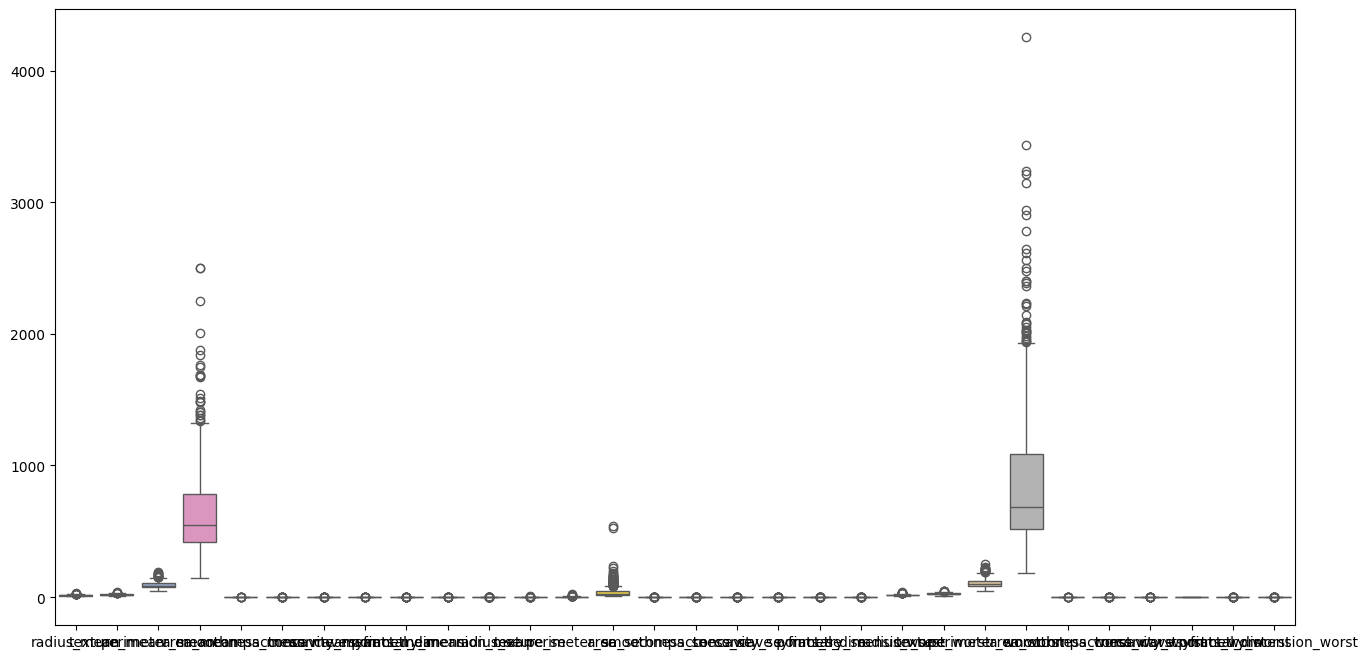

In [58]:
# Visualisation of the outliers within the data using a box plot
fig=plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')
ax = sns.boxplot(df, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

## This plot shows that there are outliers in some of the features that need to be taken care of (this matches the std value of the area_mean in the summary statistics)

In [59]:
# outlier detection
Q1 = attributes.quantile(0.25)
Q3 = attributes.quantile(0.75)
IQR = Q3 - Q1
Lower_Whisker = Q1 - 1.5 * IQR
Upper_Whisker = Q3 + 1.5 * IQR

print('Lower Whisker:')
print(Lower_Whisker)
print('\n\n\nUpperWhisker:')
print(Upper_Whisker)

Lower_outliers = attributes < Lower_Whisker
Upper_outliers = attributes > Upper_Whisker

Lower_outliers_index = Lower_outliers.any(axis=1)
Upper_outliers_index = Upper_outliers.any(axis=1)

Lower Whisker:
radius_mean                  5.580000
texture_mean                 7.725000
perimeter_mean              31.775000
area_mean                 -123.300000
smoothness_mean              0.057975
compactness_mean            -0.033300
concavity_mean              -0.122150
concave points_mean         -0.060225
symmetry_mean                0.111200
fractal_dimension_mean       0.045070
radius_se                   -0.137350
texture_se                  -0.126250
perimeter_se                -1.020500
area_se                    -23.160000
smoothness_se                0.000703
compactness_se              -0.015975
concavity_se                -0.025350
concave points_se           -0.002970
symmetry_se                  0.002680
fractal_dimension_se        -0.001217
radius_worst                 4.340000
texture_worst                8.120000
perimeter_worst             22.175000
area_worst                -337.750000
smoothness_worst             0.072500
compactness_worst           -0.1406

In [128]:
print(f'There are {sum(Lower_outliers_index)} points below the lower whisker')
print(f'There are {sum(Upper_outliers_index)} points above the upper whisker')

There are 3 points below the lower whisker
There are 170 points above the upper whisker


In [23]:
# Adjsuting outliers
median = attributes.median()
attributes = attributes.where((attributes >= Lower_Whisker) & (attributes <= Upper_Whisker), median, axis=1)

## Correlation Matrix

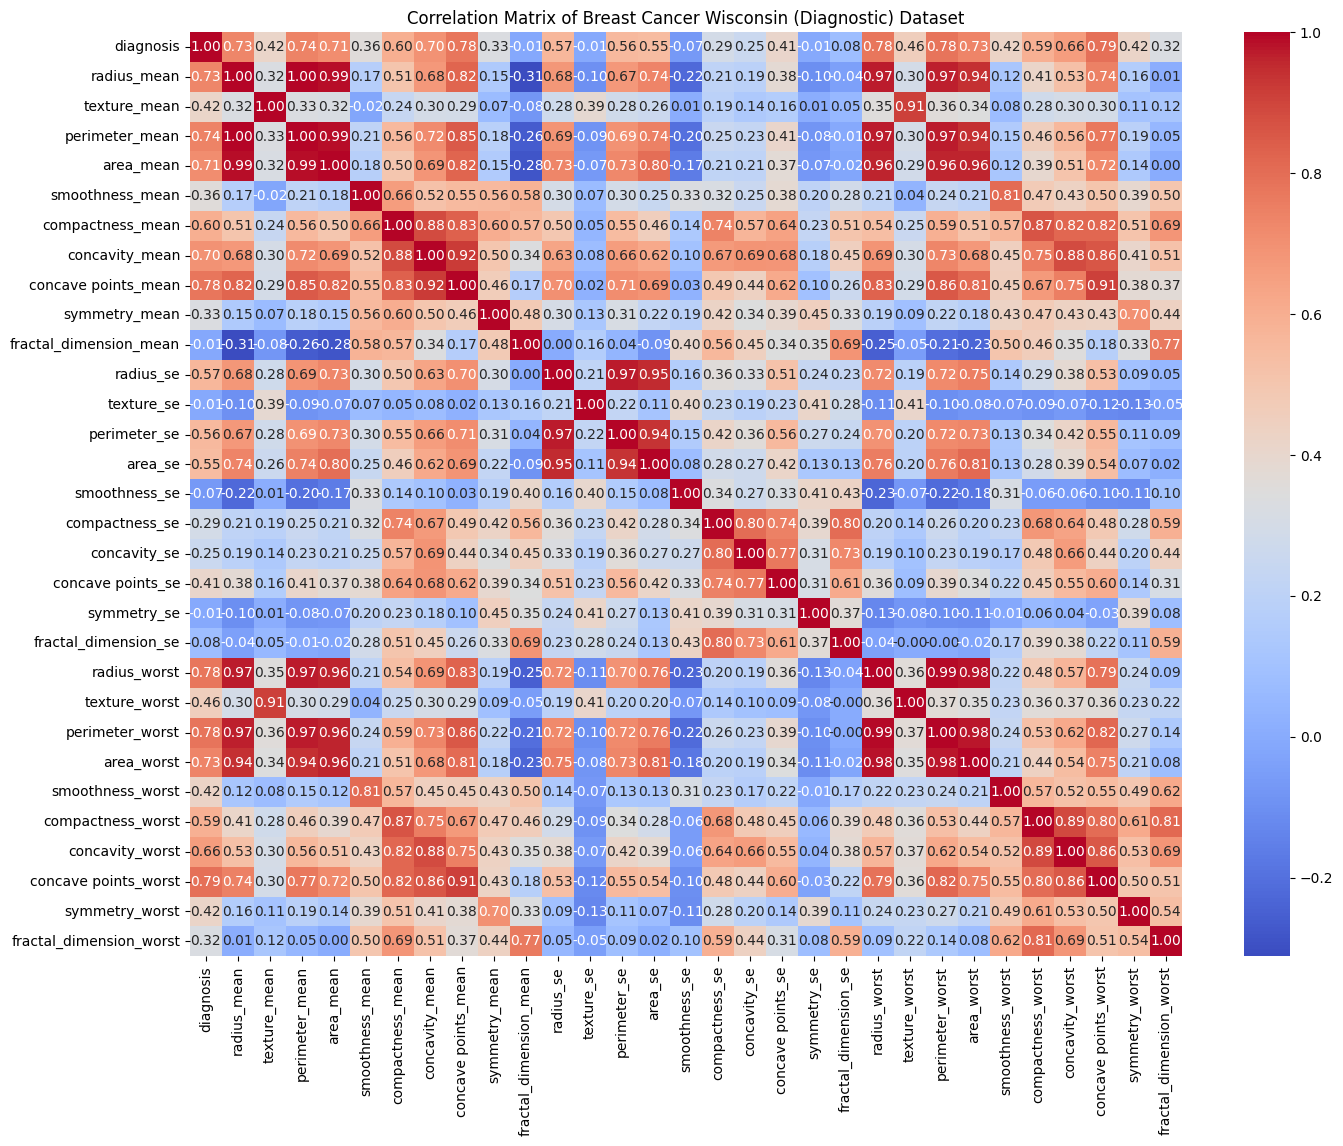

In [111]:
# Vizualize Correlations Between Features using a heatmap

# Calculating the correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Breast Cancer Wisconsin (Diagnostic) Dataset')
plt.show()

In [112]:
# Based on the correlation matrix, highly correlated features will be dropped to reduce redundancy and multicollinearity

# Only selecting the upper triangle of correlation matrix to avoid redundant calculations and ensure that each pair of features is considered only once
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Finding features with correlation greater than 0.95
f_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Printing features that will be dropped
print(f_drop)

['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']


In [113]:
for i in f_drop:
  if i in attributes.columns:
    attributes.drop(i, axis=1, inplace=True)
attributes.shape # Limited X to 23 attributes

(569, 23)

## Feature Selection

In [114]:
X = attributes
y = target_variable

In [115]:
# Select top k features with highest ANOVA F-statistic scores
k = 10  # Number of top features to select
selector = SelectKBest(f_classif, k=k)
X_new = selector.fit_transform(X, y)
# Get selected feature names
selected_features = X.columns[selector.get_support()]
print(selected_features)

Index(['radius_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'radius_se', 'texture_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst'],
      dtype='object')


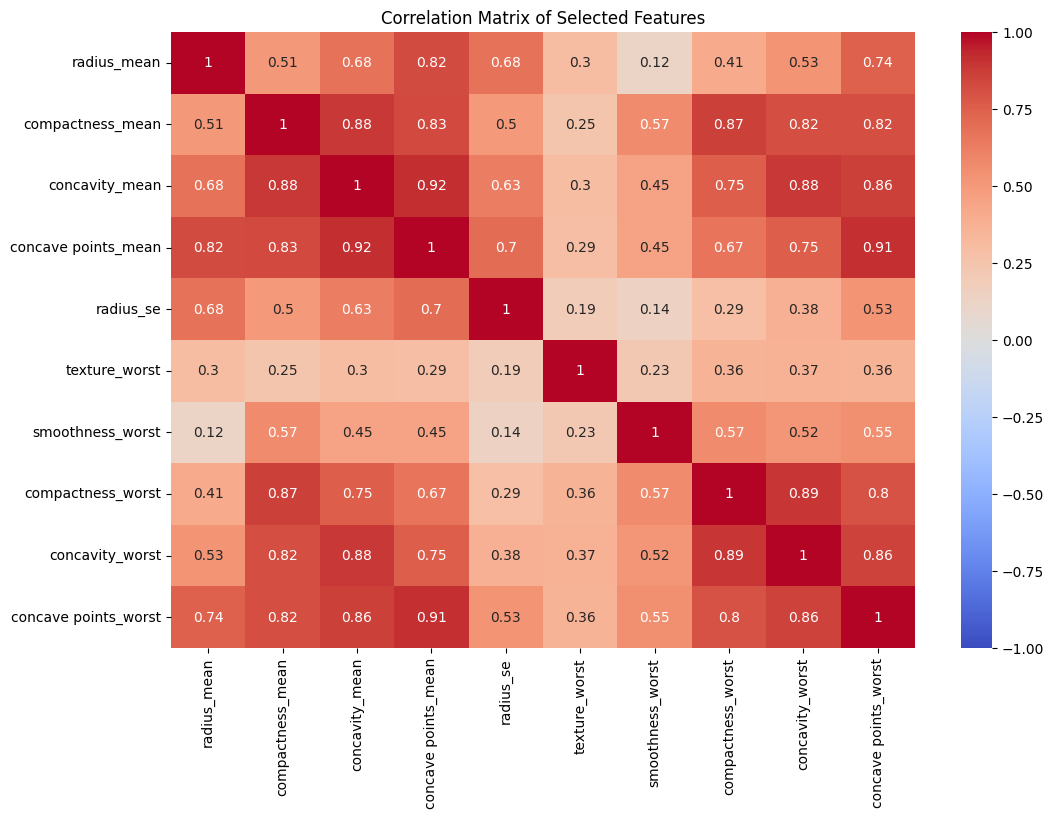

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculating the correlation matrix
correlation_matrix = X[selected_features].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [117]:
# ['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']
# Similair to the heatmap, the correlation matrix highlights the highly correlated features
# In this case, one highly correlated feature will be dropped. For example: 'perimeter_mean' and 'area_mean' are highly correlated,
# one will be removed from the df.

from sklearn.feature_selection import SelectKBest, f_classif

# Select top k features with highest ANOVA F-statistic scores
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Get feature scores
scores = selector.scores_
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})

# Display feature scores
print(feature_scores.sort_values(by='Score', ascending=False))

                    Feature       Score
20     concave points_worst  964.385393
5       concave points_mean  861.676020
0               radius_mean  646.981021
4            concavity_mean  533.793126
19          concavity_worst  436.691939
3          compactness_mean  313.233079
18        compactness_worst  304.341063
8                 radius_se  268.840327
16            texture_worst  149.596905
17         smoothness_worst  122.472880
21           symmetry_worst  118.860232
1              texture_mean  118.096059
13        concave points_se  113.262760
2           smoothness_mean   83.651123
6             symmetry_mean   69.527444
22  fractal_dimension_worst   66.443961
11           compactness_se   53.247339
12             concavity_se   39.014482
15     fractal_dimension_se    3.468275
10            smoothness_se    2.557968
7    fractal_dimension_mean    0.093459
9                texture_se    0.039095
14              symmetry_se    0.024117


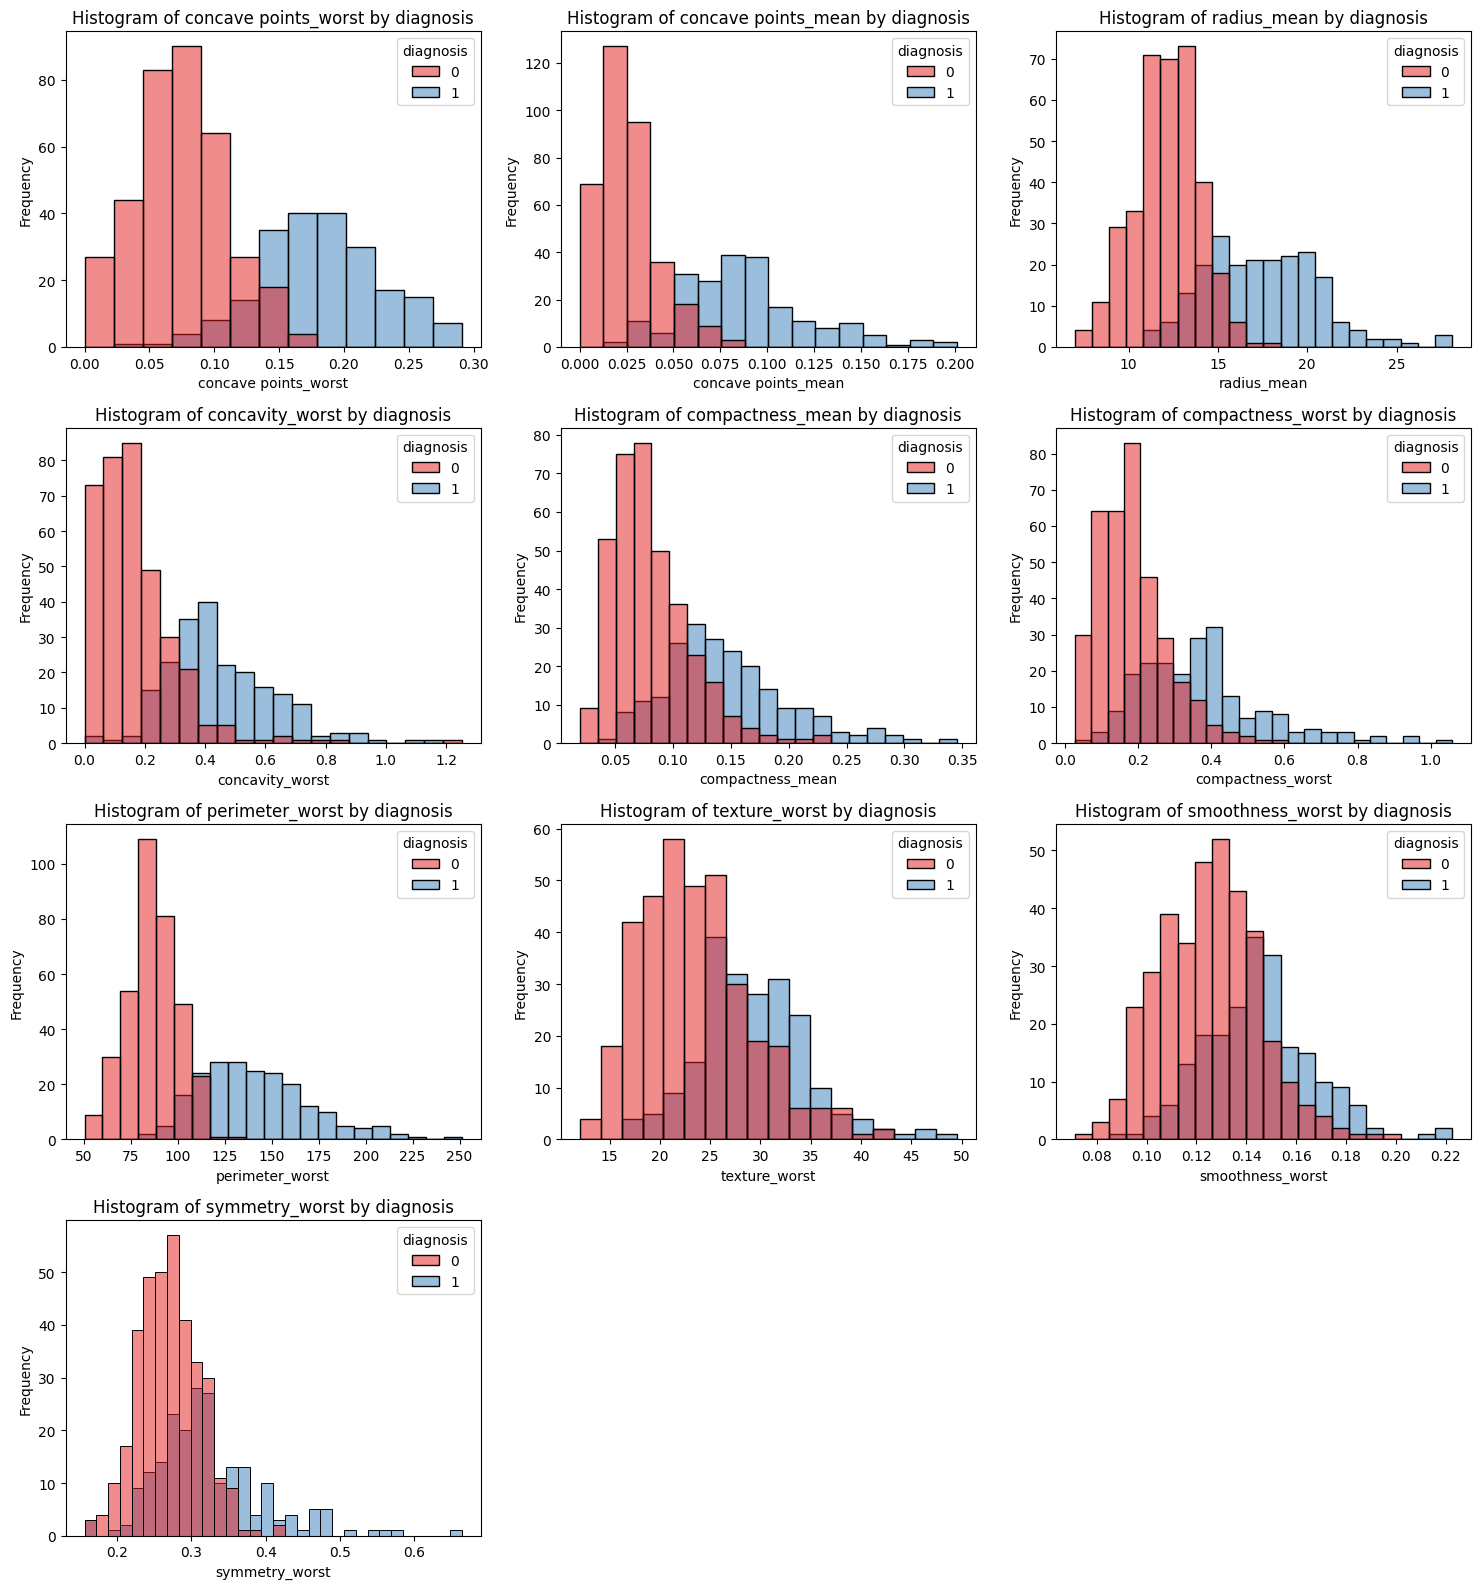

In [118]:
# Consideration of the highly correlated attributes influence on the class/target attribute:

most_significant = ['concave points_worst', 'concave points_mean', 'radius_mean', 'concavity_worst','compactness_mean', 'compactness_worst', 'perimeter_worst', 'texture_worst', 'smoothness_worst', 'symmetry_worst']
# Assigning values to target variable and features of interest:
class_attribute = 'diagnosis'
features_of_interest = most_significant

# Number of features to plot
num_features = len(features_of_interest)

# Calculate the number of rows and columns for the subplots
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols  # Calculating the number of rows required

# Creating a figure with a specific size
plt.figure(figsize=(num_cols * 5, num_rows * 4))

# Looping through the features of interest and creaing a histogram for each attribute in relation to the diagnosis attribute
for i, feature in enumerate(features_of_interest):
    plt.subplot(num_rows, num_cols, i + 1)  # Creating subplot for each feature
    sns.histplot(data=df, x=feature, hue=class_attribute, kde=False, palette="Set1")
    plt.title(f'Histogram of {feature} by {class_attribute}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Adjusting layout for readability
plt.tight_layout()
plt.show()

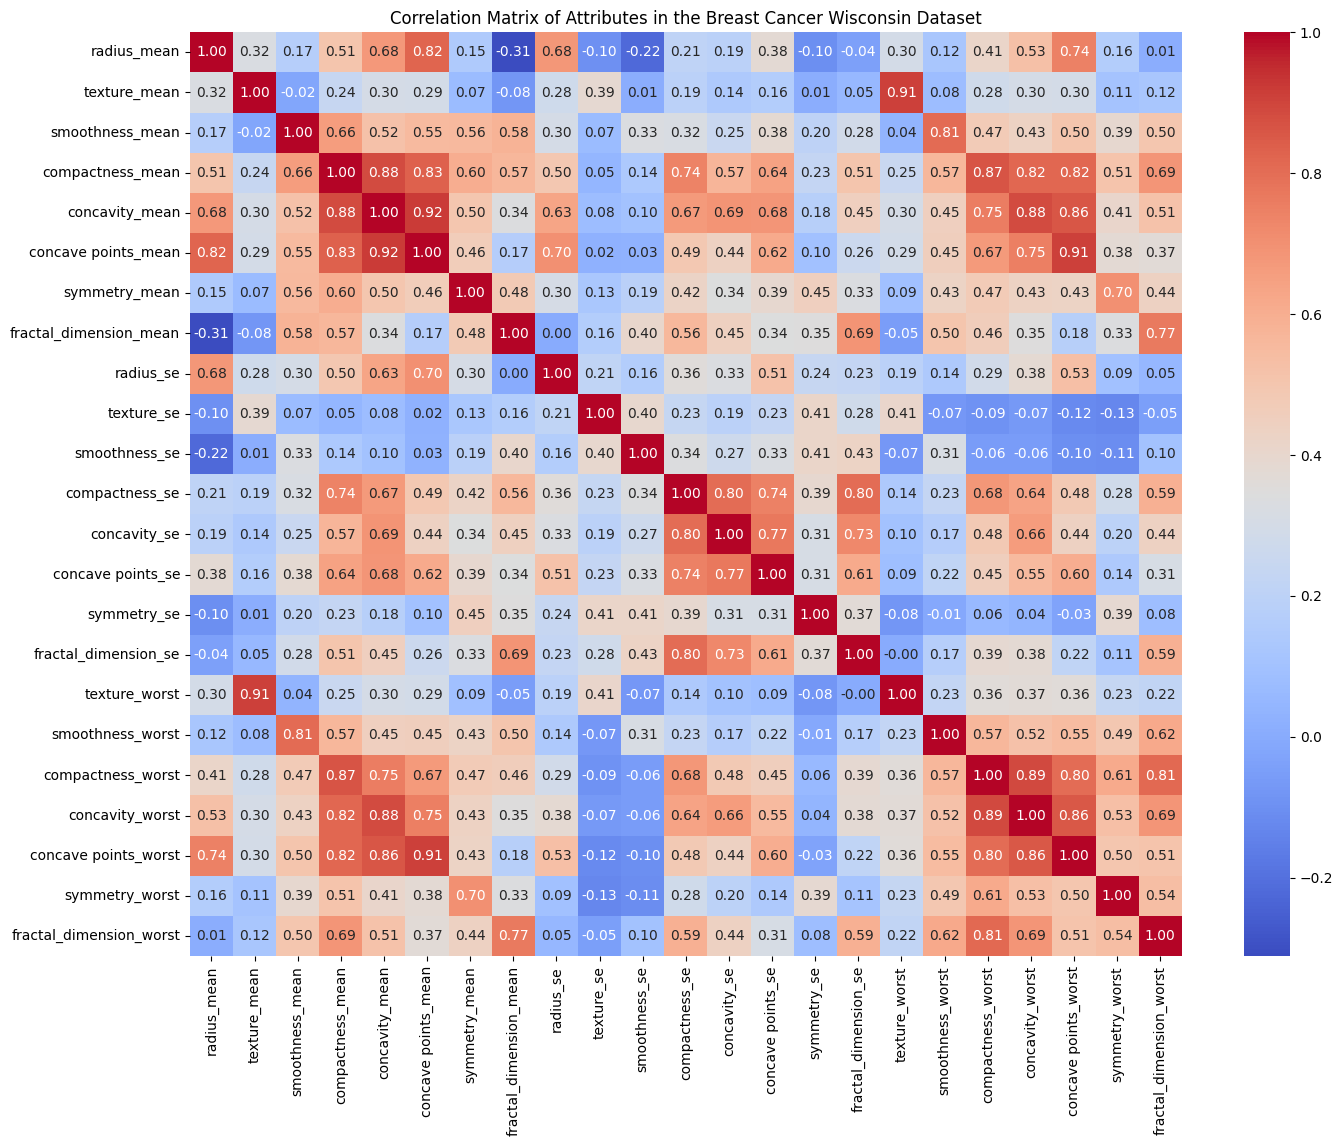

In [119]:
# Vizualize Correlations Between Features using a heatmap

# Calculating the correlation matrix
correlation_matrix = X.corr()

# Plotting the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Attributes in the Breast Cancer Wisconsin Dataset')
plt.show()

## After dropping correlated features, the heatmap matrix is almost uncorrelated. The number of features has reduced from 30 to 23.

## Modeling

In [120]:
# Normalizing the data to ensure all predictors have the same number of units

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled # Displaying the scaled data in an array

array([[ 1.09706398, -2.07333501,  1.56846633, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241, -0.82696245, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  0.94221044, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 , -0.84048388, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.52576706, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -3.11208479, ..., -1.74506282,
        -0.04813821, -0.75120669]])

## Split the Data

In [121]:
# Normalizing the data to ensure all predictors have the same number of units

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled # Displaying the scaled data in an array

array([[ 1.09706398, -2.07333501,  1.56846633, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241, -0.82696245, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  0.94221044, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 , -0.84048388, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.52576706, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -3.11208479, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [122]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets into 30% test set and 70% train set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Display the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(398, 23) (171, 23) (398,) (171,)


## Train the Model (Logistic Regression)

In [123]:
from sklearn.linear_model import LogisticRegression

# create the lr model
lr = LogisticRegression()

# fit the model to the training data
lr.fit(X_train, y_train)

# predict the target variable on test data
y_pred = lr.predict(X_test)

In [124]:
# Prediction of 0 = not malignent and prediction of 1 = malignent
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [125]:
y_test # Comparing the test and prediction outputs

204    0
70     1
131    1
431    0
540    0
      ..
69     0
542    0
176    0
501    1
247    0
Name: diagnosis, Length: 171, dtype: category
Categories (2, int64): [0, 1]

## Evaluate Model (Logistic Regression)

In [126]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy: .2f}")

Accuracy:  0.98


In [187]:
from sklearn.metrics import classification_report
print("Logistic Regression:\n", classification_report(y_test, y_pred))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       108
           1       0.95      0.98      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



percision for predicting non-malignent = 99% accuracy for predicting malignent = 95%

## Train the Model (Decision Tree)

In [133]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(ccp_alpha=0.01) # Pruning decision tree to simplify and reduce risk of overfitting
clf_dt = clf_dt.fit(X_train, y_train)

In [160]:
clf_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [161]:
X_test

array([[-0.47069438, -0.16048584,  0.23411429, ..., -0.19956318,
         0.18320441,  0.19695794],
       [ 1.36687747,  0.47014935, -0.44622733, ...,  0.97897545,
        -0.56582801, -1.00057787],
       [ 0.37850807,  0.04429607,  0.91374426, ...,  0.56024403,
        -0.10314275, -0.20813168],
       ...,
       [-1.19947481, -0.28614746,  0.04481422, ..., -0.23610702,
        -0.46390783,  1.78739191],
       [-0.08727522,  1.2101567 ,  1.41190236, ...,  0.57090264,
         1.21373066,  1.90376512],
       [-0.35140842, -1.20533898, -0.62342928, ...,  0.63180903,
        -0.42346332,  1.87605721]])

In [165]:
predictions = clf_dt.predict(X_test)
predictions

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [163]:
# show difference between tree that doesn't have stopping criteria and the one that does
clf_dt.predict_proba(X_test)

array([[0.99494949, 0.00505051],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.99494949, 0.00505051],
       [0.99494949, 0.00505051],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.99494949, 0.00505051],
       [0.84375   , 0.15625   ],
       [0.        , 1.        ],
       [0.99494949, 0.00505051],
       [0.        , 1.        ],
       [0.99494949, 0.00505051],
       [0.        , 1.        ],
       [0.99494949, 0.00505051],
       [0.99494949, 0.00505051],
       [0.99494949, 0.00505051],
       [0.        , 1.        ],
       [0.99494949, 0.00505051],
       [0.99494949, 0.00505051],
       [0.        , 1.        ],
       [0.99494949, 0.00505051],
       [0.84375   , 0.15625   ],
       [1.        , 0.        ],
       [0.99494949, 0.00505051],
       [0.84375   , 0.15625   ],
       [0.99494949, 0.00505051],
       [0.        , 1.        ],
       [0.

## Evaluate Model (Decision Tree)

In [166]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9532163742690059

In [167]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0,1])

array([[103,   5],
       [  3,  60]])

In [168]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

0.9230769230769231

In [169]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions)

0.9523809523809523

In [172]:
feature_names = X.columns
feature_names

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [173]:
clf_dt.feature_importances_

array([0.04802556, 0.        , 0.        , 0.        , 0.        ,
       0.79463204, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01446797, 0.        ,
       0.01148103, 0.08871569, 0.01093085, 0.        , 0.        ,
       0.        , 0.03174686, 0.        ])

In [174]:
feature_importance = pd.DataFrame(clf_dt.feature_importances_, index = feature_names).sort_values(by=0, ascending=False)
feature_importance

,0
concave points_mean,0.794632
texture_worst,0.088716
radius_mean,0.048026
symmetry_worst,0.031747
concave points_se,0.014468
fractal_dimension_se,0.011481
smoothness_worst,0.010931
concavity_se,0.000000
concave points_worst,0.000000
concavity_worst,0.000000


<Axes: >

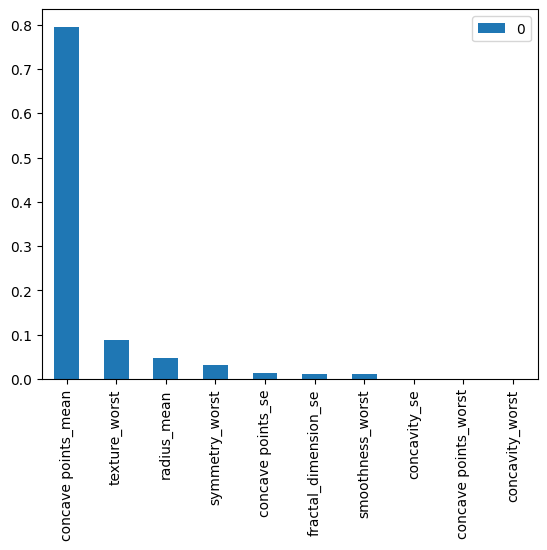

In [175]:
feature_importance.head(10).plot(kind='bar')

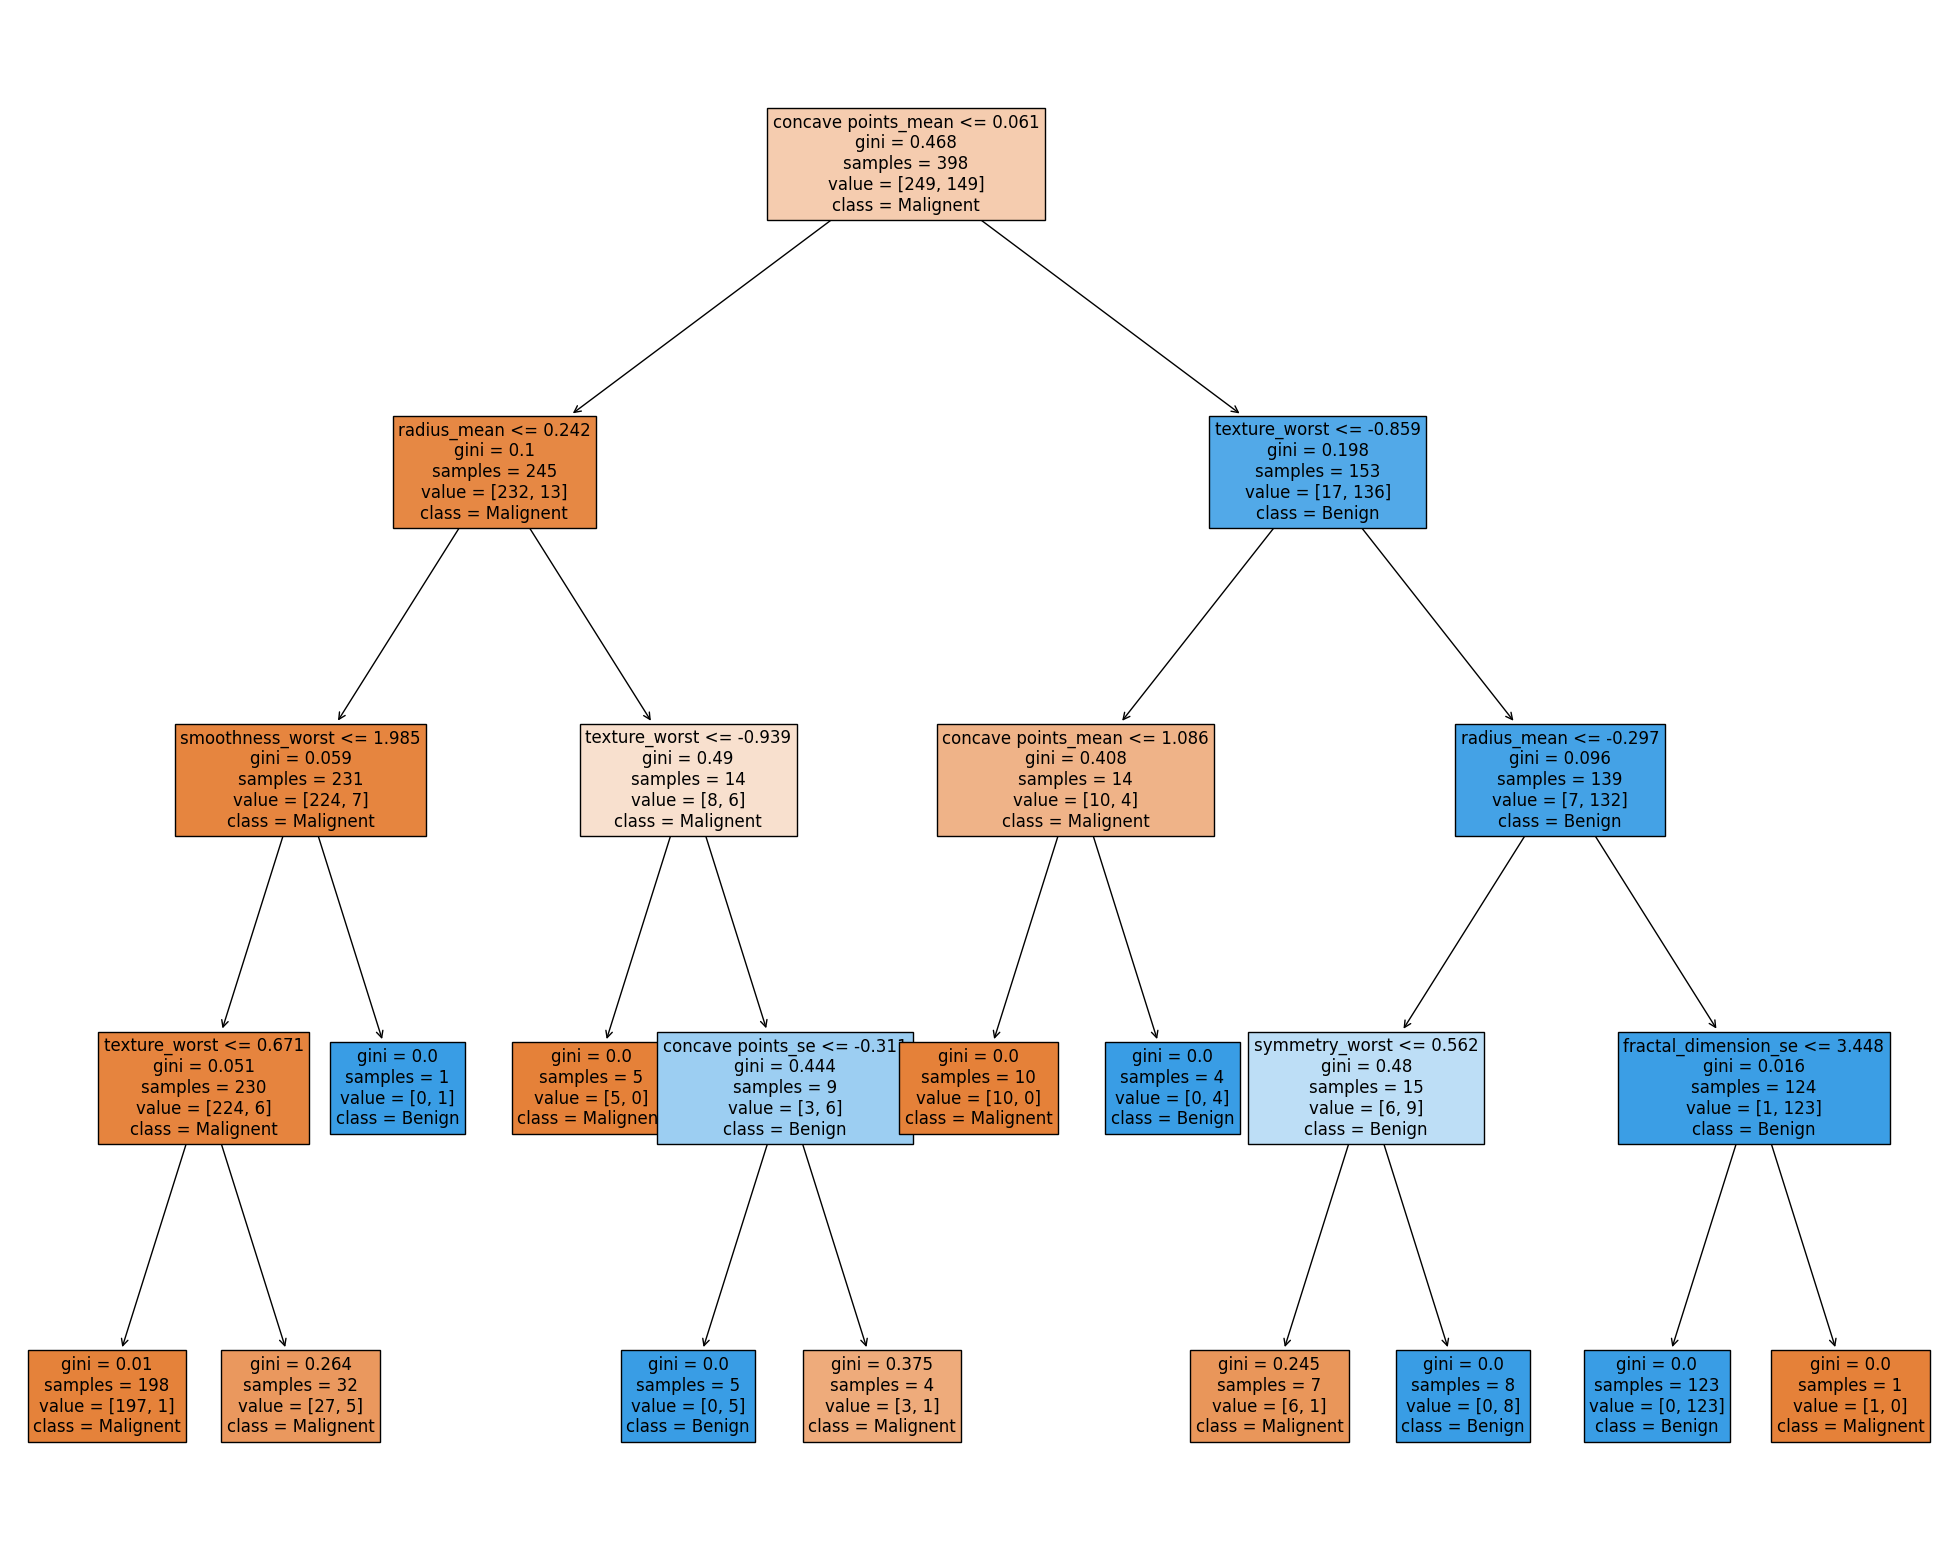

In [176]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_dt,
                   feature_names=feature_names,
                   class_names={0:'Malignent', 1:'Benign'},
                   filled=True,
                   fontsize=12)


In [185]:
from sklearn.metrics import classification_report
print("Decision Tree:\n", classification_report(y_test, predictions, target_names=['benign', 'malignant']))

Decision Tree:
               precision    recall  f1-score   support

      benign       0.97      0.95      0.96       108
   malignant       0.92      0.95      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



## Train the Model (Naive Bayes)

In [144]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

## Evaluate the Model (Naive Bayes)

In [145]:
print("Naive Bayes:\n", classification_report(y_test, y_pred_nb))

Naive Bayes:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       108
           1       0.90      0.89      0.90        63

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171

